**Plagiarism Policy**

NUS takes a strict view of plagiarism and considers it a serious form of academic dishonesty. Any student found to have engaged in such misconduct will be subjected to disciplinary action by the University. Please refer to the NUS Plagiarism Policy.

For assignments in BT4222, using any AI tools to generate code is not allowed. Sharing any part of the solution among students is not allowed either. Following the recently concluded plagiarism cases, if assignments were caught with a high degree of similarity, the presumption of guilt is applied when no hard evidence can be provided by the suspect.  


# BT4222 Assignment 2 (10 marks)
- Question 1: Explore the `Breast Cancer` dataset, train Random Forest, Logistic  Regression and SVM classifiers on it. (**4 Marks**)
- Question 2: Build a sentiment analyzer using the Naive Bayes algorithm on dataset `Amazon_review_20220923.txt` (**6 Marks**)
- Submit this .ipynb file to: Canvas > Assignments > Assignment 2
- Please use your NUS userID as the filename, i.e., "A0123456X.ipynb"

# Question 1 (4 Marks)
Train Random Forest, Logistic Regression and SVM classifiers on the `Breat Cancer` dataset.

### Task 1.1 Data Exploration(**0.5 mark**)
Please load the dataset **'Breast Cancer'** from `sklearn.datasets` and perform an exploration of the Breast Cancer dataset. This includes analyzing the correlations between features and applying Principal Component Analysis (PCA) for data dimensionality reduction. We provide the code for PCA, so you only need to load the dataset and show the correlation matrix.

- PCA is a statistical technique used in the field of data science and machine learning for the purpose of dimensionality reduction, while preserving as much of the data's variation as possible. You can know more from [here](https://builtin.com/data-science/step-step-explanation-principal-component-analysis). The scatter plot of the first two principal components can reveal interesting data patterns. The package refers to this [link](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

- **Hint**: Use `sns.heatmap` for visualizing the correlation matrix

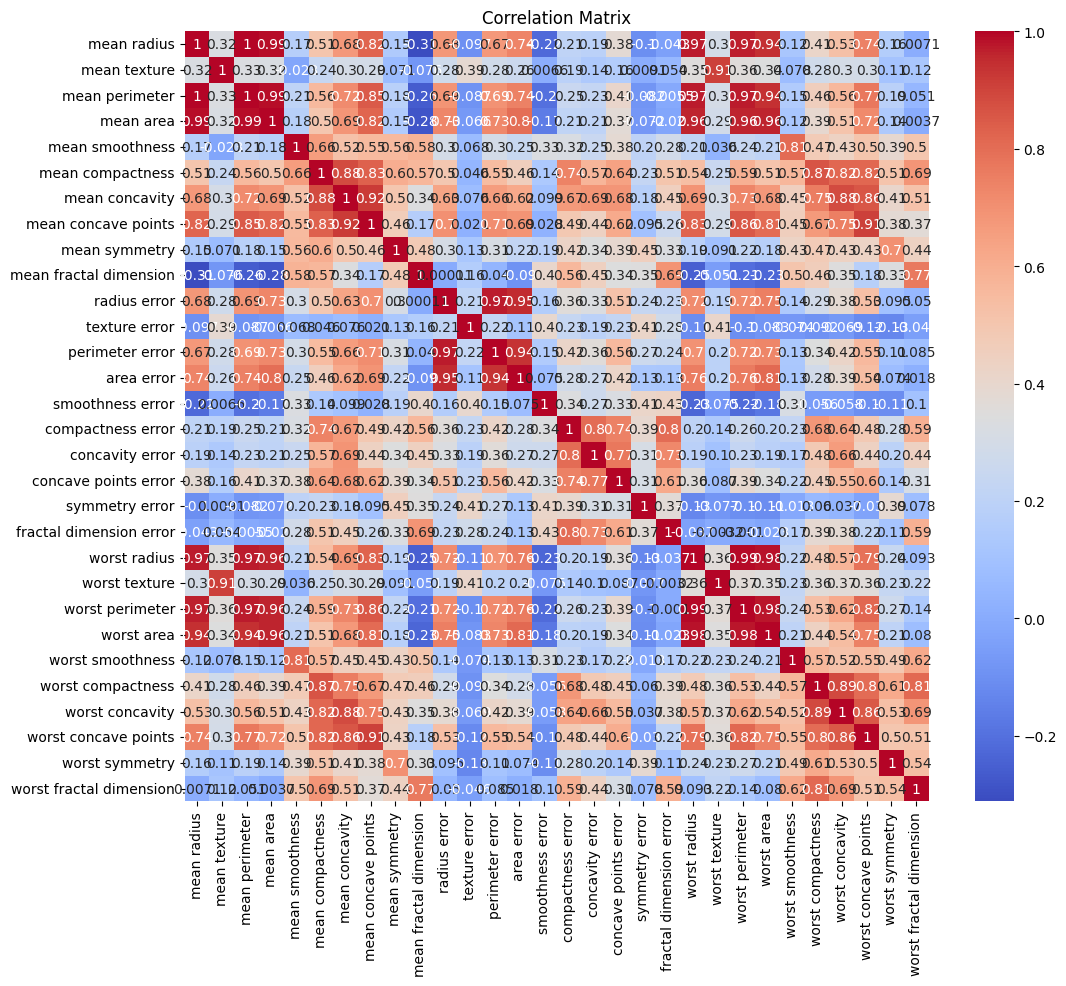

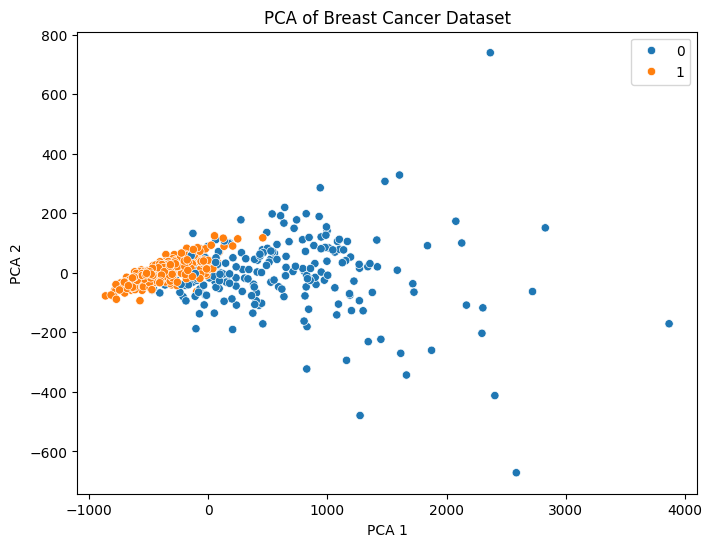

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Data Exploration (0.5 mark)
cancer = load_breast_cancer()
data = cancer.data
feature_names = cancer.feature_names
df = pd.DataFrame(data=data, columns=feature_names)

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# PCA for data dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cancer.target)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

### Task 1.2 Data Splitting (**0.5 Mark**)

Now we prepare the dataset for training and testing:

- Split the two datasets into training and test sets using Stratified Sampling(0.3 Mark)
- Explain why stratified sampling might be more appropriate than random sampling in this context(0.2 Mark)

**Hint**: `StratifiedShuffleSplit` from `sklearn.model_selection` can be used for this purpose. Consider the distributions of target classes when discussing the benefits of stratified sampling.

In [2]:
### Data Splitting (0.5 marks)
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in splitter.split(data, cancer.target):
    X_train, X_test = data[train_index], data[test_index]
    y_train, y_test = cancer.target[train_index], cancer.target[test_index]

# Print the class distributions in the training and test sets
print("Training set class distribution:")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nTest set class distribution:")
print(pd.Series(y_test).value_counts(normalize=True))

Training set class distribution:
1    0.628141
0    0.371859
dtype: float64

Test set class distribution:
1    0.625731
0    0.374269
dtype: float64


### Your answer - the benefits of stratified sampling:

As from the distribution seen above there is almost twice the amount of "with cancer" data than "without cancer" data which is a significant difference in instances.

Hence, the dataset is imbalanced, and random sampling could potentially lead to a training set that is not representative of the true distribution of classes in the population, which could result in a biased model.

Hence, stratified sampling is prefered as it ensures that both data for people with and without cancer are represented proportionally in both the training and test sets.



### Task 1.3 Logistic Regression (**0.5 Mark**)
Implement Logistic Regression models on the dataset with L1 and L2 regularization respectively. Train with the training set, then evaluate the two models performance on the testset. Show the accuracy and confusion matrix in your outcome.

**Hint**: Use LogisticRegression with penalty parameters set to 'l1' and 'l2', respectively. You might need to adjust the solver and max_iter parameter for better convergence.

In [3]:
### Logistic Regression (0.5 marks)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Logistic Regression with L1 regularization
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000, random_state=42)
lr_l1.fit(X_train, y_train)

# Predictions and evaluation for L1
y_pred_l1 = lr_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
conf_matrix_l1 = confusion_matrix(y_test, y_pred_l1)

# Logistic Regression with L2 regularization
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000, random_state=42)
lr_l2.fit(X_train, y_train)

# Predictions and evaluation for L2
y_pred_l2 = lr_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
conf_matrix_l2 = confusion_matrix(y_test, y_pred_l2)

# Display results
print("Logistic Regression with L1 regularization:")
print("Accuracy:", accuracy_l1)
print("Confusion Matrix:\n", conf_matrix_l1)

print("\nLogistic Regression with L2 regularization:")
print("Accuracy:", accuracy_l2)
print("Confusion Matrix:\n", conf_matrix_l2)


Logistic Regression with L1 regularization:
Accuracy: 0.9415204678362573
Confusion Matrix:
 [[ 56   8]
 [  2 105]]

Logistic Regression with L2 regularization:
Accuracy: 0.9415204678362573
Confusion Matrix:
 [[ 56   8]
 [  2 105]]


### Task 1.4 SVM (**1 Mark**)

- Train SVM models with 3 different kernels (linear, RBF, and polynomial) on the Breast Cancer dataset. Train with the training set, then evaluate the three models performance on the testset respectively. Show the accuracy and confusion matrix in your outcome for each model(**0.7 mark**)

- Compare their performance and explore the impact of different kernels. (**0.3 Mark**)

**Hint**: Utilize `SVC` from `sklearn.svm` and experiment with different kernel parameters. Consider the nature of each kernel and how it might fit the data.



In [4]:
### SVM (1 mark)
from sklearn.svm import SVC

# Define the kernels to evaluate
kernels = ['linear', 'rbf', 'poly']

# Train and evaluate each model
for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n{kernel.capitalize()} Kernel:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")




Linear Kernel:
Accuracy: 0.9532
Confusion Matrix:
[[ 57   7]
 [  1 106]]

Rbf Kernel:
Accuracy: 0.9064
Confusion Matrix:
[[ 51  13]
 [  3 104]]

Poly Kernel:
Accuracy: 0.9064
Confusion Matrix:
[[ 51  13]
 [  3 104]]


### Your answer - Compare different kernels:

1. The linear kernel has the highest accuracy (0.9532), followed by the RBF and polynomial kernels (both 0.9064).

2. The linear kernel has the fewest false positives (7) and false negatives (1), indicating a good balance between precision and recall.

3. The RBF and polynomial kernels have similar confusion matrices, with slightly more false positives and false negatives compared to the linear kernel.

Linear Kernel works well when the data is linearly separable, as it tries to find a linear decision boundary. It is computationally efficient and less prone to overfitting, which explains its high accuracy in this case.


RBF Kernel offers more flexibility and can capture non-linear relationships in the data. And can have a better performance on complex datasets. However, it may be more prone to overfitting, especially with a small dataset like this.


Polynomial Kernel can also capture non-linear relationships in the data. However, it may be more sensitive to the choice of hyperparameters like the degree of the polynomial and can be computationally expensive for higher degrees.


In conclusion, the linear kernel performs the best in terms of accuracy and balance between false positives and false negatives. However, the RBF and polynomial kernels may offer better performance on more complex datasets with non-linear relationships.

### Task 1.5 Data Scaler (**0.7 Mark**)
Now let's try to increase the prediction accuracy. Please try to scale the data in two different ways and then apply the scaled data to the SVM again (you can choose which kernel to use as long as they have appeared in task 1.4) and report the accuracy rate and the confusion matrix of applying the prediction model on the same test set.

- **Hint**: You can use the scaler from `sklearn.preprocessing` like `StandardScaler` to scale the input (X_train and X_test). No need to scale Y_train and Y_test. For each scaler method, please train a new model.

In [5]:
### Data Scaler (0.7 mark)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# StandardScaler
scaler_standard = StandardScaler()
X_train_scaled_standard = scaler_standard.fit_transform(X_train)
X_test_scaled_standard = scaler_standard.transform(X_test)

# SVM with linear kernel using StandardScaler
svm_linear_standard = SVC(kernel='linear', random_state=42)
svm_linear_standard.fit(X_train_scaled_standard, y_train)
y_pred_linear_standard = svm_linear_standard.predict(X_test_scaled_standard)
accuracy_linear_standard = accuracy_score(y_test, y_pred_linear_standard)
conf_matrix_linear_standard = confusion_matrix(y_test, y_pred_linear_standard)

# MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_scaled_minmax = scaler_minmax.fit_transform(X_train)
X_test_scaled_minmax = scaler_minmax.transform(X_test)

# SVM with linear kernel using MinMaxScaler
svm_linear_minmax = SVC(kernel='linear', random_state=42)
svm_linear_minmax.fit(X_train_scaled_minmax, y_train)
y_pred_linear_minmax = svm_linear_minmax.predict(X_test_scaled_minmax)
accuracy_linear_minmax = accuracy_score(y_test, y_pred_linear_minmax)
conf_matrix_linear_minmax = confusion_matrix(y_test, y_pred_linear_minmax)

# Display results
print("Linear Kernel with StandardScaler:")
print("Accuracy:", accuracy_linear_standard)
print("Confusion Matrix:\n", conf_matrix_linear_standard)

print("\nLinear Kernel with MinMaxScaler:")
print("Accuracy:", accuracy_linear_minmax)
print("Confusion Matrix:\n", conf_matrix_linear_minmax)

Linear Kernel with StandardScaler:
Accuracy: 0.9824561403508771
Confusion Matrix:
 [[ 62   2]
 [  1 106]]

Linear Kernel with MinMaxScaler:
Accuracy: 0.9707602339181286
Confusion Matrix:
 [[ 60   4]
 [  1 106]]


### Task 1.6 Random Forest (**0.3 Mark**)
Train a random forest model on the Breast Cancer dataset (you can choose whether to use scale method or not). Train with the training set, then evaluate model performance on the test set. Show the accuracy and confusion matrix in your outcome.

In [6]:
### Random Forest (0.3 mark)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display results
print("Random Forest Model:")
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)


Random Forest Model:
Accuracy: 0.935672514619883
Confusion Matrix:
 [[ 58   6]
 [  5 102]]


### Task 1.7 Model Optimization (**0.5 Mark**)

Please tune the hyperparameters ("n_estimators","max_depth" and "min_samples_split") in the RF classifier by doing a grid search with cross validation. After that, please report the hyperparameters that were chosen by the search. Then use the best estimator to make predictions on the test set and report the accuracy.

- **Hint:** You can use **GridSearchCV** for the cross validation. Please ensure that each hyperparameter to be tuned has no fewer than three possible values when setting param_distributions.

- `GridSearchCV` should be conducted on the training set because its purpose is to select the best hyperparameters for the model using cross-validation while avoiding data leakage from the test set.

In [7]:
### Model Optimization (0.5 mark)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [5, 10, 15]
}

# Create the grid search object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:")
print(grid_search.best_params_)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_estimator.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best hyperparameters:
{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.9298245614035088


# Question 2  (6 Marks)
Build a sentiment analyzer using the Naive Bayes algorithm.
the dataset file "Amazon_review_20220923.txt" contains a list of product name, customer reviews and each review is assigned a sentiment score, with 0 representing negative sentiment and 1 representing positive sentiment.

### Task 2.1 Data Import (**0.25 Mark**)
Please import the raw data into a DataFrame and separate the columns. Make the columns that contain product name and text reviews as the features, and distinguish the column containing sentiment labels as the target. Then split the data into training and testing sets (ratio 3:1)

In [8]:
import gdown
import pandas as pd
# Download the dataset
file_id = '1-tg_fgDjXTx9a5RGK76nCE0c7qqdFhkA'
url = f'https://drive.google.com/uc?id={file_id}'
output = "Amazon_review.txt"
gdown.download(url, output, quiet=False)

data = pd.read_csv("Amazon_review.txt", sep='\t')
data.head()
### Data Load and Split (0.25 mark)
from sklearn.model_selection import train_test_split

# Separate the columns into features and target
features = data[['product', 'text']]
target = data['rating']

# Split the data into training and testing sets (ratio 3:1)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

Downloading...
From: https://drive.google.com/uc?id=1-tg_fgDjXTx9a5RGK76nCE0c7qqdFhkA
To: /content/Amazon_review.txt
100%|██████████| 4.47M/4.47M [00:00<00:00, 26.3MB/s]


**Note:**
If you are unable to download the dataset from the remote Google Drive, here is the version in which you will load the datasets from your own Google Drive folder. To do so, you need to first find and download the datasets from BT4222 Canvas-->Files-->Week6-->Assignment 2; and then upload "Amazon_review.txt" into your own Google drive folder. The rest of the requirement is the same as the original version using gdown.download().

### Task 2.2 NER (**0.25 Mark**)

Named Entity Recognition could be useful in some NLP tasks. For example, in sentiment analysis, Named Entity Recognition (NER) can play a role by identifying specific entities in text, enabling more targeted and accurate emotion interpretation related to those entities. Here we try a basic NER tool.

We first install the spacy, then please select 10 reviews from the dataset you just imported, perform a basic Named Entity Recognition (NER) on them, and print out the chosen reviews along with the recognized entities and label.

- **Hint**: you can use `en_core_web_sm` in spacy. Create an `nlp` object for each review, then you can retrieve the text and label of each entity contained in the review text. Here is an example [link](https://towardsdatascience.com/named-entity-recognition-ner-using-spacy-nlp-part-4-28da2ece57c6).

In [9]:
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
### NER (0.25 mark)
nlp = spacy.load('en_core_web_sm')

reviews = data['text'].sample(10).tolist()
entities = []
for review in reviews:
  doc = nlp(review)
  entities.append([(ent.text, ent.label_) for ent in doc.ents])

for i, review in enumerate(reviews):
  print(f"Review {i+1}: {review}")
  print(f"Entities: {entities[i]}")
  print()

Review 1: Love em..great value and last long
Entities: []

Review 2: Great batteries that work great. Much better than going to the store and spending double on some name brand batteries! Definitely Buy!!!
Entities: []

Review 3: These batteries are safe for children, because it features an anti-leakage style. Plus, it's eco-friendly so it's not just good for your child, buy also in your surrounding.
Entities: []

Review 4: this tablet is great for reading the text is not a good as it is on my tab s2 9.7 in but this is about $200 cheaper i got it because i wanted a more natural book feel reading my books and the tab s2 was not doing it for me
Entities: [('about $200', 'MONEY')]

Review 5: Not to big, not to small. Just right for for taking your movies and music on the go. I bought this to go with my Amazon Prime membership. Popped in a 128 Gb mini sd card for plenty of storage.
Entities: [('Amazon', 'ORG'), ('128', 'CARDINAL'), ('Gb', 'PERSON')]

Review 6: I been having this for awhile

### Task 2.3 Data Preprocessing (**0.5 Mark**)
Please perform key preprocessing steps on the training and test text data such as tokenization, stop word removal, and then transform word counts into their respective tf-idf values.
- **Hint:** For the preprocessing step, you can use the command **CountVectorizer** and **TfidfTransformer** in sklearn, and they provide the built-in configuration to remove the stopwords.
- Please notice that we only use `text` column here. The `product` will be reserved until task 2.8

In [11]:
### Data Preprocessing (0.5 mark)
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vect = CountVectorizer(stop_words="english")
tfidf_transformer = TfidfTransformer()

# Preprocess and transform the training and test data
X_train_counts = count_vect.fit_transform(X_train["text"])
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_test_counts = count_vect.transform(X_test["text"])
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

### Task 2.4 Naive Bayes (**0.25 Mark**)
Please import the MultinomialNaive Bayes class from sklearn's naive_bayes module and fit the training
data to the model. Then please obtain the predicted sentiment values from the classifier for the training set and test set respectively.
- **Hint:** You only need to fit one model based on the training data.

In [12]:
### Naive Bayes (0.25 mark)
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
clf = MultinomialNB()

# Fit the classifier on the training data
clf.fit(X_train_tfidf, y_train)

# Predict the sentiment for the training and test sets
y_train_pred = clf.predict(X_train_tfidf)
y_test_pred = clf.predict(X_test_tfidf)

# Print the predicted sentiment values
print("Predicted sentiment for the training set:", y_train_pred)
print("Predicted sentiment for the test set:", y_test_pred)

Predicted sentiment for the training set: [1 1 1 ... 1 1 1]
Predicted sentiment for the test set: [1 1 1 ... 1 1 1]


### Task 2.5 Model Performance (**1 Mark**)
Calculate the **accuracy, precision, recall, ROC_AUC** and print the **confusion matrix** for both train and test. (**0.3 Mark**)

For the prediction of test set, please report the total number of correct predictions according to the confusion_matrix and the accuracy rate. (**0.7 Mark**)

- **Hint:** [This link](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains how to interpret both classification accuracy and the confusion matrix.

In [13]:
### Model Performance (1 mark)
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Calculate the performance metrics for the training set
y_train_accuracy = accuracy_score(y_train, y_train_pred)
y_train_precision = precision_score(y_train, y_train_pred)
y_train_recall = recall_score(y_train, y_train_pred)
y_train_roc_auc = roc_auc_score(y_train, y_train_pred)

# Calculate the performance metrics for the test set
y_test_accuracy = accuracy_score(y_test, y_test_pred)
y_test_precision = precision_score(y_test, y_test_pred)
y_test_recall = recall_score(y_test, y_test_pred)
y_test_roc_auc = roc_auc_score(y_test, y_test_pred)

# Print the performance metrics
print("Train Set Metrics:")
print("- Accuracy:", y_train_accuracy)
print("- Precision:", y_train_precision)
print("- Recall:", y_train_recall)
print("- ROC AUC:", y_train_roc_auc)
train_conf_matrix=confusion_matrix(y_train, y_train_pred)
print("Train Set Confusion Matrix:")
print(train_conf_matrix)


print("\nTest Set Metrics:")
print("- Accuracy:", y_test_accuracy)
print("- Precision:", y_test_precision)
print("- Recall:", y_test_recall)
print("- ROC AUC:", y_test_roc_auc)
test_conf_matrix=confusion_matrix(y_test, y_test_pred)
print("Test Set Confusion Matrix:")
print(test_conf_matrix)

# Calculate the number of correct predictions for the test set
correct_predictions_test = confusion_matrix(y_test, y_test_pred)[0][0] + confusion_matrix(y_test, y_test_pred)[1][1]

print("\nNumber of correct predictions for the test set:", correct_predictions_test)

Train Set Metrics:
- Accuracy: 0.9415818226967966
- Precision: 0.9409386646453162
- Recall: 0.9995973694806066
- ROC AUC: 0.6121535769459419
Train Set Confusion Matrix:
[[  271   935]
 [    6 14896]]

Test Set Metrics:
- Accuracy: 0.9378026070763501
- Precision: 0.9378170204771745
- Recall: 0.9993993993993994
- ROC AUC: 0.5583663663663663
Test Set Confusion Matrix:
[[  44  331]
 [   3 4992]]

Number of correct predictions for the test set: 5036


### Your answer
- The total number of correct predictions according to the confusion_matrix: 5036
- The accuracy rate: 0.9378 (4sf)

### Task 2.6 Result Analysis (**1 Mark**)
Determine the top 10 tokens that exhibit the highest predictive power for positive reviews,(**0.5 Mark**) as well as the top 10 tokens that exhibit the highest predictive power for negative reviews.(**0.5 Mark**)

- **Hint:** Naive Bayes automatically counts the number of times called refreach token appears in each class, as well as the number of samples in each class. You can access these counts via the `feature_count_` and `class_count_` attributes of the Naive Bayes model object. The tokens that has the highest predictive power for **positve reviews** are those that appear most frequently in positive reviews compared to their frequency in negative reviews, which could be represented as a ratio `(A token's frequency ratio in positive reviews/its frequency ratio in negative reviews)`.

- A token's frequency ratio in positive (or negative) reviews refers to its `feature_count_` over the `class_count_` for the class of positive (or negative) reviews.

- Some form of smoothing may be applied to handle cases where a token is absent in either category.

In [14]:
### Result Analysis (1 mark)
import numpy as np

# Get the counts of each token in positive and negative reviews
pos_token_count = clf.feature_count_[1]
neg_token_count = clf.feature_count_[0]

# Get the total number of samples in each class
pos_total_samples = clf.class_count_[1]
neg_total_samples = clf.class_count_[0]

# Calculate the frequency ratio for each token
pos_freq_ratio = (pos_token_count + 1)/(pos_total_samples + len(pos_token_count))
neg_freq_ratio = (neg_token_count + 1)/(neg_total_samples + len(neg_token_count))

pred_power_pos=pos_freq_ratio/neg_freq_ratio
pred_power_neg=neg_freq_ratio/pos_freq_ratio

# Get the indices of the top 10 tokens for positive and negative reviews
top_10_pos_indices = np.argsort(pred_power_pos)[::-1][:10]
top_10_neg_indices = np.argsort(pred_power_neg)[::-1][:10]

#Get the tokens corresponding to the top indices
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train['text'])

feature_names = vectorizer.get_feature_names_out()

top_10_pos_tokens = [feature_names[idx] for idx in top_10_pos_indices]
top_10_neg_tokens = [feature_names[idx] for idx in top_10_neg_indices]

# Display the top 10 tokens for positive and negative reviews
print("Top 10 tokens for positive reviews:")
for i, token in enumerate(top_10_pos_tokens):
    print(f"{i+1}. {token}")

print("\nTop 10 tokens for negative reviews:")
for i, token in enumerate(top_10_neg_tokens):
    print(f"{i+1}. {token}")


Top 10 tokens for positive reviews:
1. loves
2. excellent
3. great
4. perfect
5. value
6. easy
7. love
8. price
9. grandson
10. beat

Top 10 tokens for negative reviews:
1. worst
2. dead
3. terrible
4. horrible
5. acid
6. frustrating
7. leaked
8. awful
9. suck
10. drained


### Task 2.7 FP and FN (**1 Mark**)
Among the test set, find **up to ten** pieces of the review text  that are **false positives** and another **up to ten** that are **false negatives**. (For each category, if there are more than ten samples, list only 10 samples; otherwise, list all the samples. If the number of false positives or false positives is zero, please provide your scripts and the corresponding output as evidences.) (**0.7 Mark**)

Then, based on your knowledge of how Naive Bayes works, do you have any ideas about why the model is incorrectly classifying these reviews? (**0.3 Mark**)

- **Hint:** [This link](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb) explains the definitions of "false positives" and "false negatives".
- **Hint:** Think about what a false positive means in this context, and what a false negative means in this context. What has scikit-learn defined as the "positive class"?

In [15]:
### FP and FN (1 mark)
y_test_pred_series = pd.Series(y_test_pred, index=X_test.index)
y_test_series = pd.Series(y_test, index=X_test.index)

# Find false positives (predicted positive but actually negative)
false_positives = X_test[y_test_pred_series > y_test_series]['text'].head(10)

# Find false negatives (predicted negative but actually positive)
false_negatives = X_test[y_test_pred_series < y_test_series]['text'].head(10)

# print the samples
print("False Positives:")
print(false_positives)
print("\nFalse Negatives:")
print(false_negatives)

False Positives:
10574    Love the Dot, Hate the Tap Portable! This devi...
5814                                            Wrong Item
9652               Total crap. Batteries last for minutes.
6307     These batteries are terrible. All of my clocks...
5598     Batteries do not last! Don't waste your money ...
4671     Great price - but you get what you pay for. In...
5687     Batteries die very quickly. Spend the extra fo...
7488     Went cheap...got cheap. DO NOT BUY. Went to pa...
14956    Amazon fire is a good tablet if you like e-boo...
9755                                    short battery life
Name: text, dtype: object

False Negatives:
6243    Those of us in World War II can all appreciate...
6612    Upon counting, visually inspecting, sampling, ...
8958    Package of batteries came in Amazon shipping b...
Name: text, dtype: object


### Your explanation:

positive class is defined as positively rated products.

A false positive in this context is when the predictor states that this review is a review with high rating but in truth it has a low rating.

And a false negative in this context is when the predictor states that this review is a review with low rating but in truth it has a high rating.

From the printed text examples of the false positives and negatives there seems to be words like "great" , "love" making the false positive due to the high probability of it appearing in a positive review hence misleading the model. As naive bayes uses a bag of words style in classifying by giving each word a weight based on occurance for each category it is not able to cover the complexities of the relationship between the words hence getting misled as the features are not independant whle naive bays assumes independance between features. There are major flaws like ignoring the significance of the words "short" , "crap", "do not buy"

there are also some instances if where the review text and the rating does not have any relation or so called spam reviews.

### Task 2.8 One-Hot (**0.5 Mark**)
Use one-hot encoding to process the feature `product`.
- **Hint**: Check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) of one hot encoding.

In [16]:
### One-Hot (0.5 mark)
from sklearn.preprocessing import OneHotEncoder
product_data = data['product'].values.reshape(-1, 1)
# Create a OneHotEncoder object
ohe = OneHotEncoder(handle_unknown='error', sparse_output=False)

# Fit the encoder to the product feature and tranform data
product_encoded = ohe.fit_transform(product_data)

# Print the encoded features
print(product_encoded)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Task 2.9 Feature Combination (**0.25 Mark**)
Concatenate the `text` feature matrices (result of task 2.3) from **CountVectorizer+TfidfTransformer** and the `product` feature (result from task 2.8) from **one hot encoding**.
- **Hint**: Refer to [link A](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.vstack.html#scipy.sparse.vstack) and [link B](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.hstack.html) on how to stack two sparse matrices.

In [18]:
### Feature Combination (0.25 mark)
from scipy.sparse import hstack, vstack, csr_matrix

# Convert the dense matrix to a sparse matrix
product_encoded_sparse = csr_matrix(product_encoded[:X_train_tfidf.shape[0]])
# Concatenate the text and product features for training and testing data
X_train_combined = vstack((X_train_tfidf.transpose(), product_encoded_sparse.transpose()))
X_test_combined = vstack((X_test_tfidf.transpose(), product_encoded[:X_test_tfidf.shape[0]].transpose()))

# Transpose the matrices to have the correct dimensions
X_train_combined = X_train_combined.transpose()
X_test_combined = X_test_combined.transpose()

### Task 2.10 Model Re-training (**0.5 Mark**)
Based on the combined features, use Multinomial Naive Bayes to train a model based on the training set and to predict the sentiment of the reviews in the test set, and then calculate the **accuracy, precision, recall, ROC_AUC** and print the **confusion matrix** for both train and test dataset. Is this feature: `product` helpful?

In [19]:
### Model Re-training (0.5 mark)

# Create and fit the Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_combined, y_train)

# Predict sentiment for train and test sets
y_train_pred = nb_model.predict(X_train_combined)
y_test_pred = nb_model.predict(X_test_combined)

# Calculate evaluation metrics for train set
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Calculate evaluation metrics for test set
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Print evaluation metrics and confusion matrix
print("Training Set Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("ROC AUC:", roc_auc_train)
print("Confusion Matrix:")
print(conf_matrix_train)

print("\nTest Set Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("ROC AUC:", roc_auc_test)
print("Confusion Matrix:")
print(conf_matrix_test)


Training Set Metrics:
Accuracy: 0.9369878321331016
Precision: 0.9365608299276957
Recall: 0.9995973694806066
ROC AUC: 0.5814736432809334
Confusion Matrix:
[[  197  1009]
 [    6 14896]]

Test Set Metrics:
Accuracy: 0.9340782122905028
Precision: 0.9343065693430657
Recall: 0.9993993993993994
ROC AUC: 0.5316996996996997
Confusion Matrix:
[[  24  351]
 [   3 4992]]


#### Your explanation:
model1: without product
model2: with product

it is not very helpful. the accuracy score, precision score and Roc AUC score of model2 is all lower than that of model1, and the recall score is equal. The inclusion of the product had decreased the amount of true negatives and increased the amount of false positives in the predictions.

While overfitting may not have happened in this case(the training data's stats are not better) the added dimension might require more data to train for better results as i do not think product dimension is irrelevant as different products might have different words to describe a bad product.



### Task 2.11 Curve Plot (**0.5 Mark**)
Plot the ROC curve of the Naive Bayes classifiers trained using
- only the `text`  text feature (from task 2.3)
- both the `text` feature (from task 2.3) and `product` product feature (from task 2.8)

* **hint**: Check [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html). A reference plot is provided on the website. You don't need to follow the exact style of the reference plot.


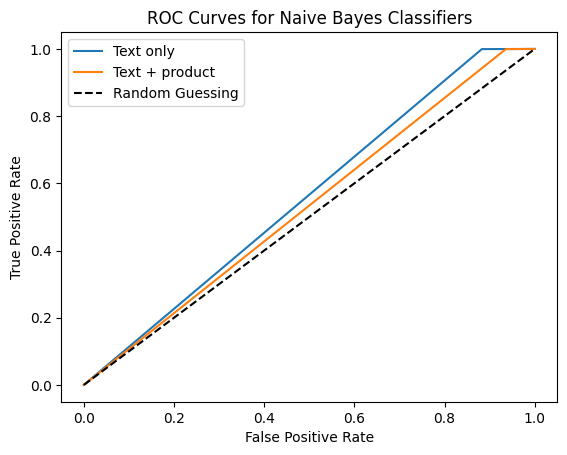

In [22]:
### Curve Plot (0.5 mark)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_test_pred = clf.predict(X_test_tfidf)
fpr_text, tpr_text, thresholds_text = roc_curve(y_test, y_test_pred)

y_test_pred_comb = nb_model.predict(X_test_combined)
fpr_text_product, tpr_text_product, thresholds_text_product = roc_curve(y_test, y_test_pred_comb)

plt.plot(fpr_text, tpr_text, label="Text only")
plt.plot(fpr_text_product, tpr_text_product, label="Text + product")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # symmetry line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Naive Bayes Classifiers')
plt.legend()
plt.show()